In [1]:
import pickle
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from icecream import ic
from pathlib import Path
import time
import os
import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print("***** Put the interpreter in UTC, to make sure no TZ issues")
os.environ["TZ"] = "UTC"
time.tzset()

***** Put the interpreter in UTC, to make sure no TZ issues


In [4]:
import sys
sys.path.append("../../../..")
import ascat

In [5]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [6]:
with open(data_dir + 'collocated_dict_ascat_9000_images_ifs_without_spurs1.pickle', 'rb') as handle:
        ascat_dict = pickle.load(handle)

In [7]:
ascat_dict['Endurance_4']

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
datetime,,,,,,,,,,,,,,,,,,,,,
2016-10-05 04:09:59.999609,-0.017382,-0.021659,356.150002,2472.300796,1010.550340,1011.750500,8.577781,8.573971,91.529049,91.343041,...,116.559998,71.680000,26.650000,36.770000,27.480000,36.750000,20161005T033000Z,20161005T051158.125000Z,2.137617,1.064369
2016-10-05 05:09:59.995250,-0.132186,0.137583,369.484998,2472.429893,1010.575636,1011.779001,8.454130,8.456720,94.734101,94.769206,...,116.559998,71.680000,26.650000,36.770000,27.480000,36.750000,20161005T033000Z,20161005T051158.125000Z,1.637512,0.816593
2016-10-05 06:10:00.028711,-0.056678,0.245910,369.254999,2472.318806,1010.085812,1011.285999,8.972475,8.942997,96.669200,96.850041,...,-145.270004,-99.449997,-53.649998,53.599998,42.259998,53.480000,20161005T042400Z,20161005T060558.125000Z,1.258376,0.824673
2016-10-05 18:09:59.967788,0.008345,-0.011118,353.265001,2472.341633,1013.002545,1014.201999,8.437812,8.443148,85.294550,84.492424,...,56.139999,101.570000,146.879990,37.759998,28.260000,37.719997,20161005T175100Z,20161005T193258.125000Z,1.861747,-2.869071
2016-10-05 19:09:59.977450,0.003995,0.017311,356.975003,2472.281558,1013.479857,1014.679004,8.372620,8.385586,83.562800,82.509306,...,56.139999,101.570000,146.879990,37.759998,28.260000,37.719997,20161005T175100Z,20161005T193258.125000Z,1.718649,-2.788275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-20 19:09:59.961609,0.384565,0.538847,328.539998,2477.981673,980.954900,982.139502,6.157890,6.232325,86.269449,85.767931,...,52.869999,98.879997,144.729996,56.590000,45.200001,56.610001,20170120T173600Z,20170120T191758.125000Z,-3.303691,-0.381402
2017-01-21 06:10:00.018663,0.301466,0.530836,325.280002,2477.817289,984.227507,985.415500,5.635275,5.740658,78.588150,77.579673,...,-143.589996,-97.419998,-51.160000,63.829998,52.379997,63.730000,20170121T043600Z,20170121T061758.125000Z,-2.311166,0.323980
2017-01-21 20:09:59.979469,0.301554,0.187796,340.339996,2476.481140,990.985359,992.178003,6.057360,6.150811,80.536600,79.690517,...,-22.949999,-67.669998,-112.449997,60.039997,48.959999,60.109997,20170121T185700Z,20170121T203858.125000Z,-2.647320,-1.400629


In [8]:
sst_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/colocated_sst"

In [9]:
df = pd.read_csv(sst_dir + '/10km/' + 'SST_collocated_ascat_Endurance_4_10km.csv')
df

,sst_kelvin,colocation_distance_km,colocation_time,buoy_latitude,buoy_longitude,buoy_time
0,-9999.0,-9999.0,05-Oct-2016 04:00:00,44.6393,235.696,05-Oct-2016 04:00:00
1,-9999.0,-9999.0,05-Oct-2016 05:00:00,44.6393,235.696,05-Oct-2016 05:00:00
2,-9999.0,-9999.0,05-Oct-2016 06:00:00,44.6393,235.696,05-Oct-2016 06:00:00
3,-9999.0,-9999.0,05-Oct-2016 18:00:00,44.6393,235.696,05-Oct-2016 18:00:00
4,-9999.0,-9999.0,05-Oct-2016 19:00:00,44.6393,235.696,05-Oct-2016 19:00:00
...,...,...,...,...,...,...
404,-9999.0,-9999.0,20-Jan-2017 19:00:00,44.6393,235.696,20-Jan-2017 19:00:00
405,-9999.0,-9999.0,21-Jan-2017 06:00:00,44.6393,235.696,21-Jan-2017 06:00:00
406,-9999.0,-9999.0,21-Jan-2017 20:00:00,44.6393,235.696,21-Jan-2017 20:00:00
407,-9999.0,-9999.0,22-Jan-2017 05:00:00,44.6393,235.696,22-Jan-2017 05:00:00


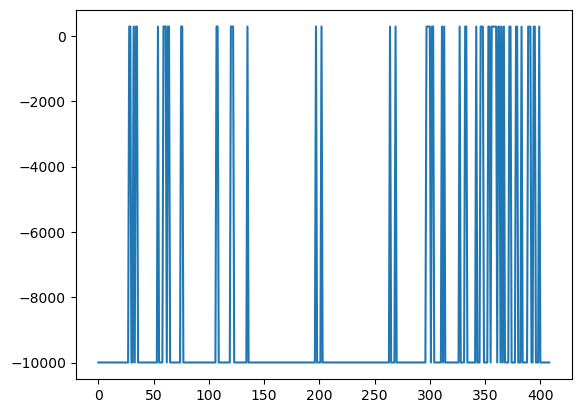

In [10]:
plt.plot(df['sst_kelvin'])

In [11]:
for buoy in ascat_dict.keys():
    try:
        sst_10km = pd.read_csv(sst_dir + '/10km/' + 'SST_collocated_ascat_' + buoy + '_10km.csv')
        sst_15km = pd.read_csv(sst_dir + '/15km/' + 'SST_collocated_ascat_' + buoy + '_15km.csv')
        sst_20km = pd.read_csv(sst_dir + '/20km/' + 'SST_collocated_ascat_' + buoy + '_20km.csv')
        sst_25km = pd.read_csv(sst_dir + '/25km/' + 'SST_collocated_ascat_' + buoy + '_25km.csv')
        sst_30km = pd.read_csv(sst_dir + '/30km/' + 'SST_collocated_ascat_' + buoy + '_30km.csv')

        ascat_dict[buoy]['sst_10km'] = sst_10km['sst_kelvin'].values
        ascat_dict[buoy]['colocation_distance_10km'] = sst_10km['colocation_distance_km'].values
        ascat_dict[buoy]['sst_15km'] = sst_15km['sst_kelvin'].values
        ascat_dict[buoy]['colocation_distance_15km'] = sst_15km['colocation_distance_km'].values
        ascat_dict[buoy]['sst_20km'] = sst_20km['sst_kelvin'].values
        ascat_dict[buoy]['colocation_distance_20km'] = sst_20km['colocation_distance_km'].values
        ascat_dict[buoy]['sst_25km'] = sst_25km['sst_kelvin'].values
        ascat_dict[buoy]['colocation_distance_25km'] = sst_25km['colocation_distance_km'].values
        ascat_dict[buoy]['sst_30km'] = sst_30km['sst_kelvin'].values
        ascat_dict[buoy]['colocation_distance_30km'] = sst_30km['colocation_distance_km'].values
    except:
        print('Could not add SST data for bouy: ', buoy)

Could not add SST data for bouy:  CLIMODE


In [12]:
ascat_dict['Irminger_3'][['UWr', 'rhoair', 'sigma0_trip_fore', 'u10', 'v10', 'colocation_distance_15km',  'colocation_distance_20km']]

,UWr,rhoair,sigma0_trip_fore,u10,v10,colocation_distance_15km,colocation_distance_20km
datetime,,,,,,,
2016-07-10 22:11:00.002925,-0.016792,1.256439,-27.038279,-0.382364,4.319931,-9999.0000,-9999.0000
2016-07-10 23:11:00.012195,-0.023148,1.256706,-27.038279,0.043869,3.863628,-9999.0000,-9999.0000
2016-07-11 12:10:59.985949,-0.008453,1.258117,-26.535995,3.570541,2.784671,-9999.0000,-9999.0000
2016-07-11 13:11:00.003236,-0.007296,1.257028,-26.535995,3.167235,2.580248,-9999.0000,-9999.0000
2016-07-11 14:10:59.983016,-0.003911,1.255727,-26.535995,3.113663,3.497056,-9999.0000,-9999.0000
...,...,...,...,...,...,...,...
2017-08-11 23:11:59.980186,-0.061721,1.245206,-30.524120,6.137578,-6.958117,-9999.0000,-9999.0000
2017-08-12 00:11:59.981048,-0.026354,1.245716,-30.524120,6.818631,-6.098079,-9999.0000,-9999.0000
2017-08-12 12:11:59.989959,-0.001817,1.241915,-31.923285,3.346715,-5.353880,-9999.0000,-9999.0000


In [13]:
with open(data_dir + 'collocated_dict_ascat_9000_images_ifs_without_spurs1_sst.pickle', 'wb') as handle:
    pickle.dump(ascat_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)